In [11]:
import pandas as pd
from pandas_datareader import data, wb
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import json
import requests

start = datetime(2018, 1, 1)
end = datetime(2019, 4, 30)

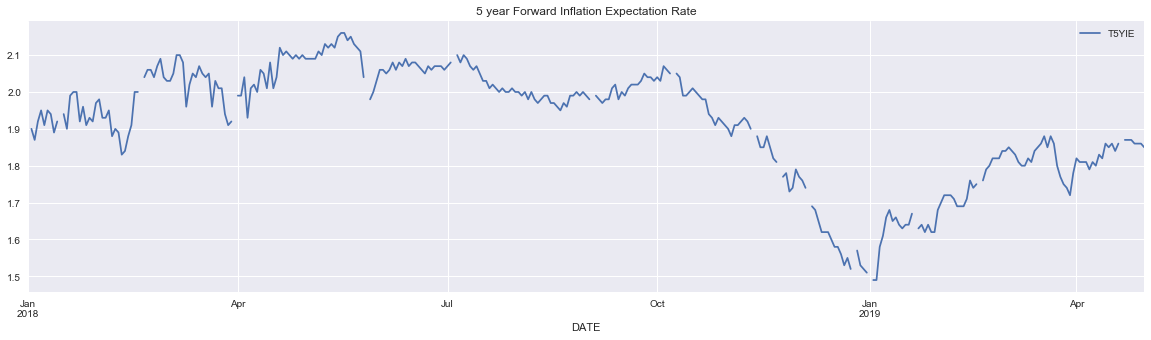

In [14]:
inflation = data.DataReader('T5YIE', 'fred', start, end)
inflation.plot(figsize=(20,5), title='5 year Forward Inflation Expectation Rate'), plt.show();

In [23]:
import yfinance as yf
yf.pdr_override()
stock = pdr.get_data_yahoo('AMZN', start, end)
stock.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,1172.000000,1190.000000,1170.510010,1189.010010,1189.010010,2694500
2018-01-03,1188.300049,1205.489990,1188.300049,1204.199951,1204.199951,3108800
2018-01-04,1205.000000,1215.869995,1204.660034,1209.589966,1209.589966,3022100
2018-01-05,1217.510010,1229.140015,1210.000000,1229.140015,1229.140015,3544700
2018-01-08,1236.000000,1253.079956,1232.030029,1246.869995,1246.869995,4279500


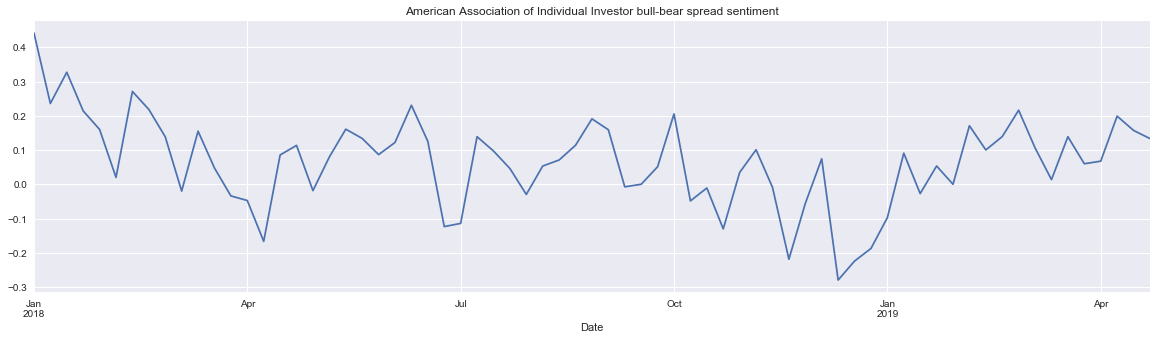

,Bullish,Neutral,Bearish,Total,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close
Date,,,,,,,,,,,,
2018-01-04,0.597531,0.246914,0.155556,1.000001,0.431950,0.441975,0.382182,0.483619,0.280746,2714.37,2673.61,2713.06
2018-01-11,0.486726,0.262537,0.250737,1.000000,0.456106,0.235989,0.382203,0.483613,0.280794,2759.14,2697.77,2748.23
2018-01-18,0.541133,0.244973,0.213894,1.000000,0.479381,0.327239,0.382198,0.483577,0.280819,2807.54,2736.06,2802.56
2018-01-25,0.454545,0.305195,0.240260,1.000000,0.491267,0.214285,0.382163,0.483521,0.280805,2852.97,2778.38,2837.54
2018-02-01,0.447712,0.264706,0.287582,1.000000,0.501135,0.160130,0.382157,0.483485,0.280830,2872.87,2813.04,2823.81


In [24]:
import quandl
investor_sentiment = quandl.get('AAII/AAII_SENTIMENT', start_date = start, end_date = end)
investor_sentiment['Bull-Bear Spread'].plot(figsize=(20,5), title='American Association of Individual Investor bull-bear spread sentiment'), plt.show()
investor_sentiment.head()

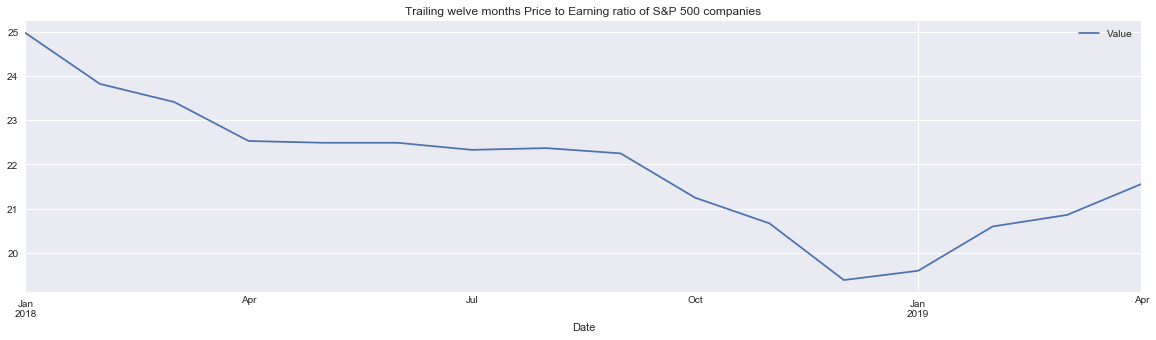

In [25]:
spx = quandl.get('MULTPL/SP500_PE_RATIO_MONTH', start_date = start, end_date= end)
spx.plot(figsize=(20,5), title='Trailing welve months Price to Earning ratio of S&P 500 companies'), plt.show();

In [52]:
from iexfinance.stocks import Stock

a = Stock("AAPL", token="pk_258da4ee628a41baa81cc9ca2e27358d")
a.get_quote()
#a.get_balance_sheet()
#a.get_earnings()
#a.get_company()

{'symbol': 'AAPL',
 'companyName': 'Apple, Inc.',
 'primaryExchange': 'NASDAQ',
 'calculationPrice': 'close',
 'open': 376.9,
 'openTime': 1596115800521,
 'openSource': 'official',
 'close': 384.76,
 'closeTime': 1596139201103,
 'closeSource': 'official',
 'high': 385.19,
 'highTime': 1596153599565,
 'highSource': '15 minute delayed price',
 'low': 375.07,
 'lowTime': 1596117620740,
 'lowSource': '15 minute delayed price',
 'latestPrice': 384.76,
 'latestSource': 'Close',
 'latestTime': 'July 30, 2020',
 'latestUpdate': 1596139201103,
 'latestVolume': 39532505,
 'iexRealtimePrice': 402.71,
 'iexRealtimeSize': 10,
 'iexLastUpdated': 1596142516780,
 'delayedPrice': 409.55,
 'delayedPriceTime': 1596153599565,
 'oddLotDelayedPrice': 384.94,
 'oddLotDelayedPriceTime': 1596139204789,
 'extendedPrice': 409.55,
 'extendedChange': 24.79,
 'extendedChangePercent': 0.06443,
 'extendedPriceTime': 1596153599565,
 'previousClose': 380.16,
 'previousVolume': 22582314,
 'change': 4.6,
 'changePercent'

In [54]:
response = requests.get("https://sandbox.iexapis.com/stable/stock/aapl/financials?token=Tpk_53e30ef0593440d5855c259602cad185")
jdictionary = json.loads(response.text)
financials = pd.DataFrame(jdictionary['financials'])
financials

,reportDate,fiscalDate,currency,grossProfit,costOfRevenue,operatingRevenue,totalRevenue,operatingIncome,netIncome,researchAndDevelopment,...,totalLiabilities,currentCash,currentDebt,shortTermDebt,longTermDebt,totalCash,totalDebt,shareholderEquity,cashChange,cashFlow
0,2020-03-28,2020-03-27,USD,22899415558,37444525791,60965049902,60364702284,13015479190,11447181319,4682336702,...,244619485276,30357369277,22410863777,21828437859,101406665531,95421294537,121217359206,80725553259,1403571083,13673726414


In [18]:
response = requests.get("https://www.alphavantage.co/query?function=FX_DAILY&from_symbol=EUR&to_symbol=USD&apikey=demo")
alphadict = json.loads(response.text)
eur = pd.DataFrame(alphadict['Time Series FX (Daily)']).T
eur.index = pd.to_datetime(eur.index)
eur = eur.sort_index(ascending = True)
eur.columns = ['open', 'high', 'low', 'close']
eur = eur.astype(float)
eur.head()

,open,high,low,close
2020-03-16,1.1157,1.1237,1.1084,1.1168
2020-03-17,1.1168,1.1189,1.0954,1.1015
2020-03-18,1.1015,1.1045,1.0801,1.0933
2020-03-19,1.0933,1.0982,1.0653,1.0663
2020-03-20,1.0663,1.0831,1.0636,1.0693


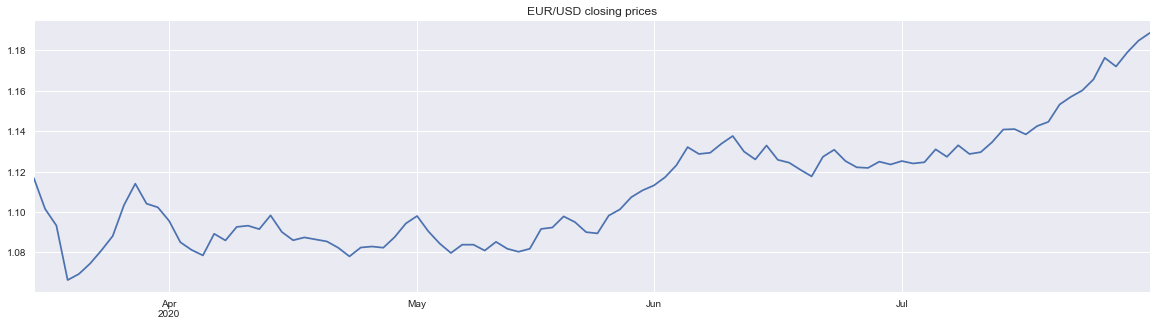

In [64]:
eur['close'].plot(figsize=(20,5), title='EUR/USD closing prices'), plt.show();

response = requests.get("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&apikey=demo")
alphadict = json.loads(response.text)
alphadict.keys()

In [80]:
stock = pd.DataFrame(alphadict['Time Series (Daily)']).T
stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2020-07-30 to 2020-03-10
Data columns (total 5 columns):
1. open      100 non-null object
2. high      100 non-null object
3. low       100 non-null object
4. close     100 non-null object
5. volume    100 non-null object
dtypes: object(5)
memory usage: 4.7+ KB


In [82]:
type(stock.index)

pandas.core.indexes.base.Index

In [84]:
stock.index= pd.to_datetime(stock.index)
type(stock.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [86]:
stock.columns

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')

In [91]:
stock.columns = ['open', 'high', 'low', 'close', 'volume']
stock.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [92]:
stock = stock.astype(float)

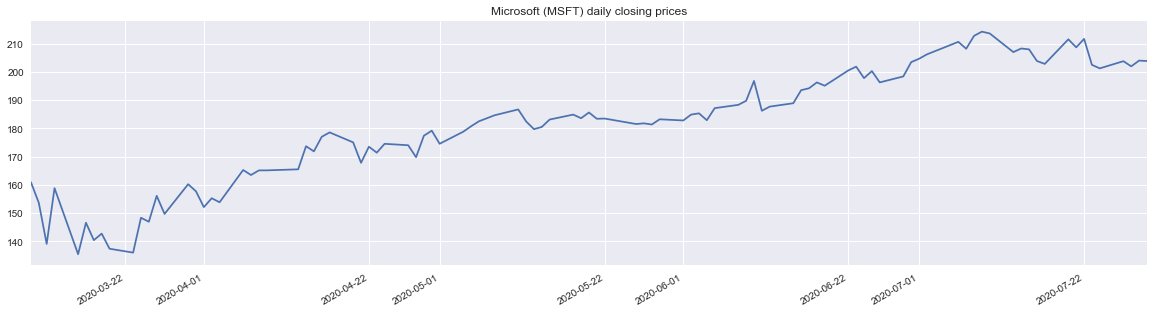

In [93]:
stock['close'].plot(figsize=(20,5), title='Microsoft (MSFT) daily closing prices'), plt.show();

In [94]:
sample = stock.sample(10)
sample

,open,high,low,close,volume
2020-03-20,146.00,147.10,135.8600,137.35,84866215.0
2020-05-18,185.75,186.20,183.9600,184.91,35306620.0
2020-07-24,200.42,202.86,197.5100,201.30,39826989.0
2020-06-29,195.78,198.53,193.5500,198.44,26701586.0
2020-06-25,197.80,200.61,195.4675,200.34,27803933.0
2020-04-02,151.86,155.48,150.3600,155.26,49630735.0
2020-05-22,183.19,184.46,182.5400,183.51,20826898.0
2020-04-06,160.32,166.50,157.5800,165.27,67111697.0
2020-07-20,205.00,212.30,203.0100,211.60,36386080.0
2020-04-13,164.35,165.57,162.3000,165.51,41905264.0


In [99]:
summary = stock.describe()
summary

,open,high,low,close,volume
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,181.304923,184.250848,178.560039,181.567100,4.386665e+07
std,20.570348,19.518760,21.086675,20.486307,1.793642e+07
min,137.010000,140.570000,132.520000,135.420000,1.963260e+07
25%,170.798075,173.644925,167.527550,169.312500,3.154239e+07
50%,183.170000,185.000000,181.820300,183.205000,3.721864e+07
75%,198.057500,200.647500,195.289450,198.915000,5.278789e+07
max,216.330000,216.380000,211.470000,214.320000,9.322637e+07


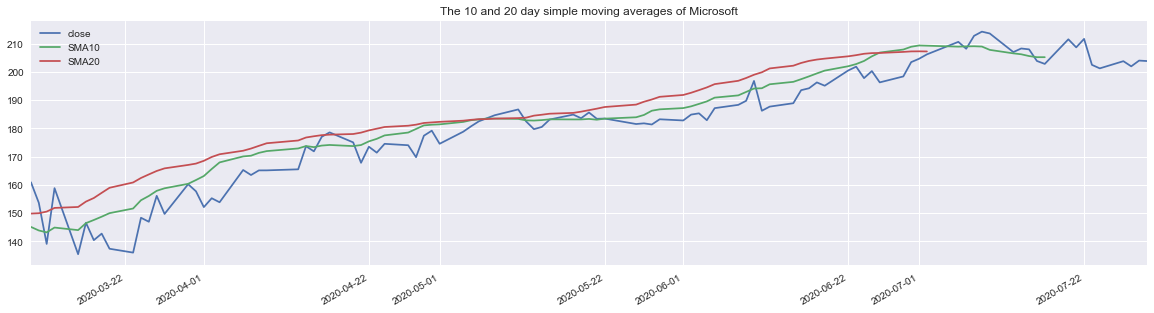

In [101]:
stock['SMA10'] = stock['close'].rolling(10).mean()
stock['SMA20'] = stock['close'].rolling(20).mean()
stock[['close', 'SMA10', 'SMA20']].plot(figsize=(20, 5), grid = True, title='The 10 and 20 day simple moving averages of Microsoft'),plt.show();

In [102]:
stock.head()

,open,high,low,close,volume,SMA10,SMA20
2020-07-30,201.00,204.46,199.57,203.90,25079596.0,NaN,NaN
2020-07-29,202.50,204.65,202.01,204.06,19632602.0,NaN,NaN
2020-07-28,203.61,204.70,201.74,202.02,23251388.0,NaN,NaN
2020-07-27,201.47,203.97,200.86,203.85,30160867.0,NaN,NaN
2020-07-24,200.42,202.86,197.51,201.30,39826989.0,NaN,NaN


In [104]:
stock = stock.sort_index(ascending = True)
stock.head()

,open,high,low,close,volume,SMA10,SMA20
2020-03-10,158.1600,161.03,152.58,160.92,65354385.0,145.087,149.8175
2020-03-11,157.1304,157.70,151.15,153.63,56504304.0,143.829,149.9460
2020-03-12,145.3000,153.47,138.58,139.06,93226366.0,143.158,150.5210
2020-03-13,147.5000,161.91,140.73,158.83,92727446.0,144.863,151.8250
2020-03-16,140.0000,149.35,135.00,135.42,87905868.0,143.950,152.1590


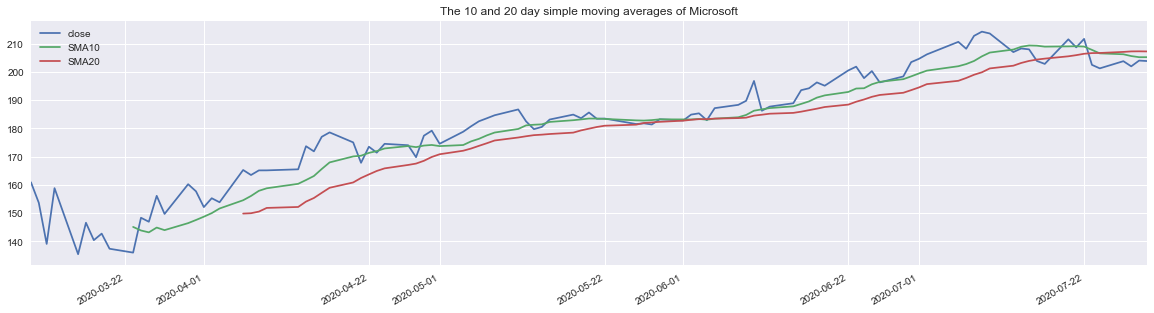

In [106]:
stock['SMA10'] = stock['close'].rolling(10).mean()
stock['SMA20'] = stock['close'].rolling(20).mean()
stock[['close', 'SMA10', 'SMA20']].plot(figsize=(20, 5), grid = True, title='The 10 and 20 day simple moving averages of Microsoft'),plt.show();


In [108]:
stock.head()


,open,high,low,close,volume,SMA10,SMA20
2020-03-10,158.1600,161.03,152.58,160.92,65354385.0,NaN,NaN
2020-03-11,157.1304,157.70,151.15,153.63,56504304.0,NaN,NaN
2020-03-12,145.3000,153.47,138.58,139.06,93226366.0,NaN,NaN
2020-03-13,147.5000,161.91,140.73,158.83,92727446.0,NaN,NaN
2020-03-16,140.0000,149.35,135.00,135.42,87905868.0,NaN,NaN


                open    high     low   close      volume    SMA10     SMA20
2020-04-06  160.3200  166.50  157.58  165.27  67111697.0  154.548  149.8175
2020-04-07  169.5923  170.00  163.26  163.49  62769038.0  156.063  149.9460
2020-04-08  165.6700  166.67  163.50  165.13  48318234.0  157.884  150.5210
2020-04-09  166.3600  167.37  163.33  165.14  51431775.0  158.787  151.8250
2020-04-13  164.3500  165.57  162.30  165.51  41905264.0  160.368  152.1590


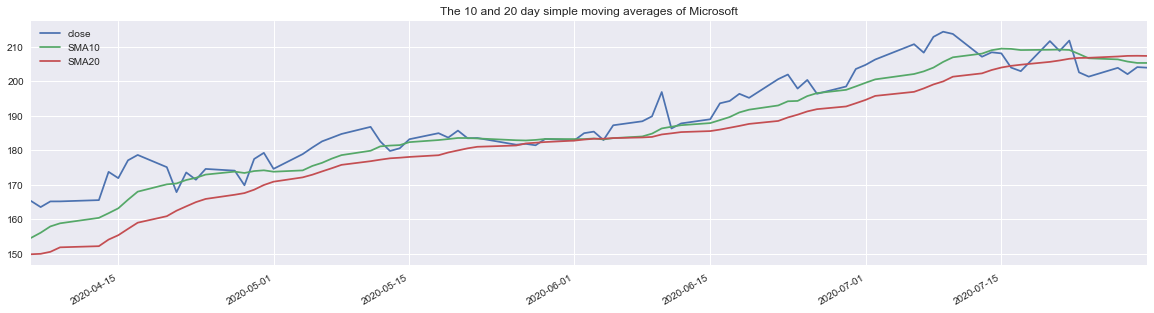

In [112]:
stock.dropna(inplace=True)
print(stock.head())
stock[['close', 'SMA10', 'SMA20']].plot(figsize=(20,5), grid = True, title='The 10 and 20 day simple moving averages of Microsoft'), plt.show();

In [125]:
signal = pd.DataFrame()

signal['crossover']= stock['SMA10'] - stock['SMA20']
signal.tail()

,crossover
2020-07-24,-0.1405
2020-07-27,-0.8385
2020-07-28,-1.6505
2020-07-29,-2.0760
2020-07-30,-2.0380


In [129]:
#stock = stock.join(signal, how='left')
stock.tail()

,open,high,low,close,volume,SMA10,SMA20,crossover
2020-07-24,200.42,202.86,197.51,201.30,39826989.0,206.620,206.7605,-0.1405
2020-07-27,201.47,203.97,200.86,203.85,30160867.0,206.298,207.1365,-0.8385
2020-07-28,203.61,204.70,201.74,202.02,23251388.0,205.665,207.3155,-1.6505
2020-07-29,202.50,204.65,202.01,204.06,19632602.0,205.267,207.3430,-2.0760
2020-07-30,201.00,204.46,199.57,203.90,25079596.0,205.265,207.3030,-2.0380


In [131]:
signal['close-close'] = stock['close'].diff()
signal.head()

,crossover,close-close
2020-04-06,4.7305,NaN
2020-04-07,6.1170,-1.78
2020-04-08,7.3630,1.64
2020-04-09,6.9620,0.01
2020-04-13,8.2090,0.37


In [133]:
signal.dropna(inplace=True)
quality = (signal['crossover'] > 0) & (signal['close-close'] > 0) | (signal['crossover'] < 0) & (signal['close-close'] < 0)
#complex selection technique in Pandas that gives boolean dataframe. Positive on the left and negative on the right.
quality.head()

2020-04-07    False
2020-04-08     True
2020-04-09     True
2020-04-13     True
2020-04-14     True
dtype: bool

In [135]:
quality = quality.astype(int)
quality.head()

2020-04-07    0
2020-04-08    1
2020-04-09    1
2020-04-13    1
2020-04-14    1
dtype: int32

In [136]:
proportion_correct = quality.sum()/quality.count()
proportion_correct

0.625

In [138]:
information_coefficient = 2*proportion_correct - 1
information_coefficient

0.25

In [139]:
signal.corr(method='spearman')

,crossover,close-close
crossover,1.000000,0.003329
close-close,0.003329,1.000000
